# 3주차 스터디

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 사용할 데이터셋 불러오기
from sklearn.datasets import fetch_california_housing
dict_house = fetch_california_housing()

# 딕셔너리 형태로 반환된 데이터를 예쁘게 데이터프레임 형태로 변형해보자
X = dict_house['data']
y = dict_house['target']

a = dict_house['feature_names']
b = dict_house['target_names']

X_y = np.c_[X,y]
col = a+b

df = pd.DataFrame(data=X_y, columns=col)

# 데이터를 살펴보자
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# info로 Null값이 존재하는 지 찾아보자
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 1. 데이터 전처리

**데이터 분리하기**

전처리 첫 번째 단계로 데이터를 Train_set(훈련세트)와 Test_set(테스트세트)로 분리해 줘야 한다


-> 왜 분리 할까?

In [5]:
# 처음에 얻었던 X,y를 사용해도 되지만, 만약에 처음부터 데이터프레임형태로 데이터를 받았다면....
## 이런식으로 values를 붙여줘서 넘파이 어레이로 변환해 줄 수 있다
X = df[["MedInc","HouseAge","AveRooms",	"AveBedrms","Population","AveOccup","Latitude","Longitude"]].values
y = df["MedHouseVal"].values 

In [6]:
# train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# 앞에서 분리해 둔 X,y를 사용 (Shuuffle이 필요하지만, train_test_split은 shuffle을 자동으로 처리해준다 -> 시계열일 경우 shuffle=False를 해주면 된다)
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 잘 분리 된 것을 확인 할 수 있다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

**특성 추가하기**

PolinomialFeature를 사용해 고차항 특성을 추가해보겠습니다

In [7]:
# reshape(-1,1)을 해주는 이유는? -> 각각을 하나의 데이터로 인식하도록 하기 위해서
X_sample = np.arange(1,5).reshape(-1,1)
X_sample

array([[1],
       [2],
       [3],
       [4]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# degree로 몇차식까지 추가할 지 선택할 수 있습니다
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=True일 경우 1이 추가됩니다
X_poly = poly_features.fit_transform(X_sample)

X_poly

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

**스케일 조절하기**

* Normalization(정규화), MinMaxScaling 등이 있다 

* 몇몇 머신러닝 알고리즘을 제외하고는 피처(Feature)의 스케일에 민감하다. 따라서 스케일을 조절해줘야 한다

* fit을 해주면 필요한 통계량을 계산한다. 이후 transfrom 해준다. (!! Test_set에는 fit 하지 않도록 주의해야 한다 !!)

In [9]:
# 최소는 0, 최대는 1로 변환한다
from sklearn.preprocessing import MinMaxScaler

# 예시
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X_train) 

# 변형이 잘 된 것으로 확인할 수 있다
X_minmax

array([[0.10807437, 0.58823529, 0.02528951, ..., 0.00197099, 0.1606383 ,
        0.63645418],
       [0.3569399 , 0.21568627, 0.04187383, ..., 0.00194624, 0.17659574,
        0.50796813],
       [0.25562406, 0.2745098 , 0.0343127 , ..., 0.00098656, 0.03191489,
        0.71115538],
       ...,
       [0.13343954, 0.64705882, 0.02881789, ..., 0.00198273, 0.23297872,
        0.62350598],
       [0.10121929, 0.62745098, 0.03069369, ..., 0.00228522, 0.43085106,
        0.47011952],
       [0.20819023, 0.62745098, 0.02996232, ..., 0.00139477, 0.54787234,
        0.22808765]])

In [10]:
# 과연 최댓값은 1로, 최솟값은 0으로 변환이 되었을 지 확인해보자 ("HouseAge"는 array의 1번째)

# argmax는 최대값이 위치한 인덱스를 반환합니다
idx_max = np.argmax(X_minmax[:,1])
idx_min = np.argmin(X_minmax[:,1])

# 최댓값은 1, 최솟값은 0으로 잘 변환이 된 것을 확인할 수 있습니다
print("최대: ", X_minmax[idx_max])
print("최소: ", X_minmax[idx_min])

최대:  [0.18205266 1.         0.02687253 0.01921384 0.01334118 0.00154998
 0.1712766  0.60557769]
최소:  [0.30172687 0.         0.03322758 0.01855058 0.0008128  0.00111327
 0.26914894 0.6374502 ]


In [11]:
# 가장 표준이 되는 "정규화" -> 데이터의 평균이 0, 분산은 1을 따르도록 정규화한다
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X_train)

X_std

array([[-0.95498644,  0.1934033 , -0.39177896, ...,  0.01045891,
        -0.73944448,  0.80772617],
       [ 0.96474265, -1.31665186,  0.50603775, ...,  0.00773126,
        -0.66922419,  0.16295945],
       [ 0.18320022, -1.0782221 ,  0.09670463, ..., -0.09802996,
        -1.30588817,  1.18259053],
       ...,
       [-0.75932154,  0.43183306, -0.20076483, ...,  0.01175244,
        -0.42111249,  0.74274967],
       [-1.00786597,  0.35235647, -0.09921574, ...,  0.04508778,
         0.44961914, -0.02697183],
       [-0.18270059,  0.35235647, -0.13880928, ..., -0.05304327,
         0.96456795, -1.24153239]])

In [12]:
# 번외편: 이 정도 전처리는 싸이킷런을 안쓰고도 할 수 있어야 한다.
## 직접 정규화를 수행해 봅시다.

# 정규화 -> 평균을 빼주고, 표준편차로 나눈다 (직접 시켜보기)
mean = X_train.mean(axis=0)   # axis바꿔가며 결과 보여주기
std = X_train.std(axis=0)

# 정규화 해주자 -> 결과가 똑같이 나왔다!!!
(X_train - mean) / std 

array([[-0.95498644,  0.1934033 , -0.39177896, ...,  0.01045891,
        -0.73944448,  0.80772617],
       [ 0.96474265, -1.31665186,  0.50603775, ...,  0.00773126,
        -0.66922419,  0.16295945],
       [ 0.18320022, -1.0782221 ,  0.09670463, ..., -0.09802996,
        -1.30588817,  1.18259053],
       ...,
       [-0.75932154,  0.43183306, -0.20076483, ...,  0.01175244,
        -0.42111249,  0.74274967],
       [-1.00786597,  0.35235647, -0.09921574, ...,  0.04508778,
         0.44961914, -0.02697183],
       [-0.18270059,  0.35235647, -0.13880928, ..., -0.05304327,
         0.96456795, -1.24153239]])

**Null값 다루기+범주형 특성 전처리하기**

* 순서가 의미가 있는 특성과, 의미가 없는 특성이 있다

* 의미가 있는 특성은 이산변수(Discrete Variable)로, 없는 특성은 더미변수(Dummy Variable)로 변환해준다

In [13]:
# 새로운 데이터셋 불러오기 (타이타닉 데이터셋)
from seaborn import load_dataset
df = load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# 이 데이터셋의  "survived","sex","age","sibsp","parch","class" 특성만 사용하겠습니다

# 우선 우리가 사용할 특성들만 데이터프레임에서 분리하겠습니다.
df = df.loc[:,["survived","sex","age","sibsp","parch","class"]]
df.head(6)

,survived,sex,age,sibsp,parch,class
0,0,male,22.0,1,0,Third
1,1,female,38.0,1,0,First
2,1,female,26.0,0,0,Third
3,1,female,35.0,1,0,First
4,0,male,35.0,0,0,Third
5,0,male,NaN,0,0,Third


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 35.9+ KB


In [16]:
# age의 데이터는 714개로 177개의 Null값이 존재합니다.
# 177개의 데이터는 drop하기에는 너무 많습니다. 나이의 Null값에 평균 나이를 집어 넣는 간단한 방법으로 전처리 해 보겠습니다

## 싸이킷런의 SimpleImputer를 사용하겠습니다
from sklearn.impute import SimpleImputer

age_data = df['age'].values.reshape(-1,1)

# 나이의 결측값에 나이의 평균을 집어넣겠습니다
impute = SimpleImputer(strategy='mean')
df['age'] = impute.fit_transform(age_data)

print(df.shape)
df.head(6)

(891, 6)


,survived,sex,age,sibsp,parch,class
0,0,male,22.000000,1,0,Third
1,1,female,38.000000,1,0,First
2,1,female,26.000000,0,0,Third
3,1,female,35.000000,1,0,First
4,0,male,35.000000,0,0,Third
5,0,male,29.699118,0,0,Third


In [17]:
# 범주형 특성을 처리하기에 앞서, 예시를 하나 보고 넘어가도록 하겠습니다.
## 더미변수를 만드는 예시를 보여드리겠습니다  -> 위 데이터셋의 class를 더미변수로 만들겠습니다. 값에는 First,Second,Third가 있습니다(1등석,2등석,3등석)

# 싸이킷런의 OneHotEncoder를 사용합니다
from sklearn.preprocessing import OneHotEncoder

class_data = df['class'].values.reshape(-1,1)

onehot = OneHotEncoder()
class_one_hot = onehot.fit_transform(class_data)

# 싸이킷런의 OneHotEncoder는 희소행렬을 반환하기 때문에, 시각적으로 확인하고 싶다면 밀집행렬로 변환해야한다
class_one_hot.todense()

matrix([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]])

In [18]:
# 이제 범주형 특성을 처리해 보겠습니다.
## ColumnTransformer는 원하는 열만 선택해서 원하는 변환을 적용 할 수 있습니다
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 범주형 columns를 선택해줍니다
col = ["sex","class"]

# 선택한 columns에만 OneHotEncoder를 적용해 줍니다. 선택하지 않은 columns는 drop해버리기 때문에, remainder="passthrough"로 선택해줘야 합니다
column_pipe = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), col)], remainder="passthrough")
df2 = column_pipe.fit_transform(df)

#데이터 프레임으로 보기 좋게 출력해 보겠습니다
col_name = column_pipe.get_feature_names_out()
pd.DataFrame(df2, columns=col_name)

,OneHot__sex_female,OneHot__sex_male,OneHot__class_First,OneHot__class_Second,OneHot__class_Third,remainder__survived,remainder__age,remainder__sibsp,remainder__parch
0,0.0,1.0,0.0,0.0,1.0,0.0,22.000000,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,26.000000,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,35.000000,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,35.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.0,0.0,27.000000,0.0,0.0
887,1.0,0.0,1.0,0.0,0.0,1.0,19.000000,0.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0,29.699118,1.0,2.0
889,0.0,1.0,1.0,0.0,0.0,1.0,26.000000,0.0,0.0


In [19]:
# 판다스를 사용해서 더미변수를 만들 수 있습니다. (원래 있던 df데이터를 사용) -> 판다스가 알아서 카테고리데이터를 인식합니다
pd.get_dummies(data=df)

,survived,age,sibsp,parch,sex_female,sex_male,class_First,class_Second,class_Third
0,0,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,1,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,1,0,0
4,0,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,0,1,0,1,0
887,1,19.000000,0,0,1,0,1,0,0
888,0,29.699118,1,2,1,0,0,0,1
889,1,26.000000,0,0,0,1,1,0,0


In [20]:
# 이번엔 순서를가진(Ordinal) 데이터를 인코딩해보겠습니다
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal.fit_transform(df["class"].values.reshape(-1,1))[:10]

array([[2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.]])

### 데이터분석 

**Overfitting & Underfitting**

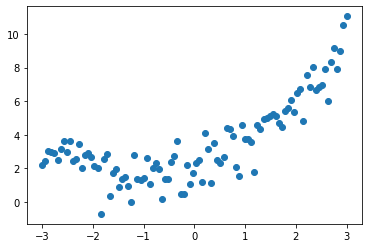

In [21]:
# 데이터 피팅을 위해서 임의의 데이터를 생성하겠습니다.
m = 100

X_new = np.linspace(-3,3,100).reshape(-1,1)
y_new = 0.5 * X_new**2 + X_new + 2 + np.random.randn(m, 1)
plt.scatter(X_new,y_new);

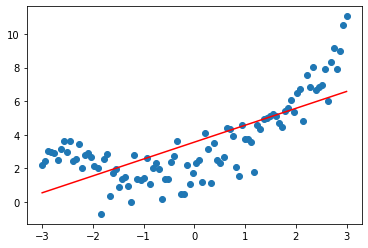

In [22]:
# Underfitting 예시 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_new)

# 그림으로 그려보겠습니다 -> 데이터의 곡선을 똑바로 잡아내지 못 한 것을 확인할 수 있습니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

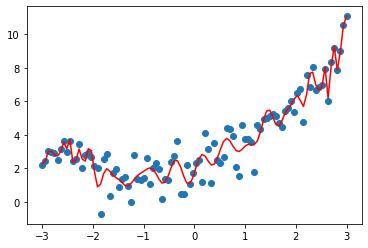

In [29]:
# Overfitting 예시 
from sklearn.linear_model import LinearRegression

poly_feature = PolynomialFeatures(degree=100, include_bias=False)
X_poly = poly_feature.fit_transform(X_new)

std_scaler = StandardScaler()
X_poly_std = std_scaler.fit_transform(X_poly)

linear_model = LinearRegression()
linear_model.fit(X_poly_std,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_poly_std)

# 그림으로 그려보겠습니다 -> 현재 주어진 데이터에 너무 과도하게 맞춰진 것을 확인할 수 있습니다 -> 오버피팅의 예시입니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');